In [4]:

        # Imports and Initialization
        %load_ext autoreload
        %autoreload 2
        import matplotlib.pyplot as plt
        import numpy as np
        import pandas as pd
        import warnings
        from tqdm.auto import tqdm
        import itertools
        import matplotlib as mpl
        from voting_mechanism_design.legacy.op_simulator import Simulation
        warnings.simplefilter(action='ignore', category=UserWarning)
        

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from voting_mechanism_design.agents.quorum_badgeholder import QuorumBadgeholder, QuorumBadgeholderPopulation
from voting_mechanism_design.projects.project import Project, ProjectPopulation
from voting_mechanism_design.funds_distribution.threshold_and_aggregate import ThresholdAndAggregate
from voting_mechanism_design.sim import RoundSimulation

import matplotlib.pyplot as plt
import numpy as np
import itertools
from collections import defaultdict
from tqdm import tqdm
import pandas as pd
import warnings

# OP simulator configuration
from voting_mechanism_design.legacy.op_simulator import Simulation as OPSimulation

In [8]:
def run_single_quorum_threshold_simulation(
        n_badgeholders=50,
        badgeholder_expertise_vec=None,
        badgeholder_laziness_vec=None,
        n_projects=100,
        project_impact_vec=None,
        quorum_vec=None,
        scoring_fn='mean',
        min_vote_amt=1,
        max_vote_amt=16,
        max_funding=100,
        random_seed=1234
    ):
    sim_configs = list(itertools.product(quorum_vec, scoring_fn))
    pass_results = []
    for sim_config in tqdm(sim_configs):
        q, score_fn = sim_config
        simulation = Simulation()

        simulation.initialize_round(
            max_funding=max_funding,
        )
        simulation.randomize_voters(
            num_voters=n_badgeholders, 
            willingness_to_spend=1.0, 
            laziness_factor=0.1, 
            expertise_factor=0.9
        )
        simulation.randomize_projects(
            num_projects=137
        )

        results = simulation.simulate_voting_and_scoring(
            n=n_badgeholders,
            scoring_method=score_fn,
            quorum=q,
            min_amount=1,
            normalize=True
        )
        summary = analyze_simulation(results, generate_plots=False)
        data = results['data']
        project_df = pd.DataFrame(data).sort_values(by='token_amount', ascending=False)
        pass_results.append({
            'quorum': q,
            'score_fn': score_fn,
            'project_df': project_df,
        })


# Placeholder function for run_single_simulation
def run_single_simulation(n_badgeholders, badgeholder_expertise_vec, badgeholder_laziness_vec, n_projects, project_impact_vec, quorum, scoring_fn, min_vote_amt, max_vote_amt, max_funding, random_seed):
    # Implement the actual simulation logic here
    np.random.seed(random_seed)
    
    # Dummy results for the sake of example
    results = {
        'metrics': {
            'pairwise': np.random.rand(),
            'qt': np.random.rand()
        },
        'data': []
    }
    return results


In [5]:

        # Extracted and adapted from sim_fil.ipynb and simulator.py
        def plot_distribution(project_df):    
            fig, ax = plt.subplots(figsize=(8,5))
            project_df['token_amount'].plot(kind='bar', width=1, ax=ax)
            ax.set_xticks([])
            ax.set_xlabel("")
            ax.set_ylabel("Tokens")
            
        def plot_alignment(project_df):    
            fig, ax = plt.subplots(figsize=(8,5))
            project_df.plot(kind='scatter', x='rating', y='token_amount', ax=ax)
            ax.set_ylabel("Tokens")
            ax.set_xlabel("Impact")
            ax.set_xticks([])
            
        def plot_all(project_df, save_fp=None):
            fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True)
            project_df['token_amount'].plot(kind='bar', width=1, ax=ax[0])
            project_df.plot(kind='scatter', x='rating', y='token_amount', ax=ax[1])
            ax[0].set_xticks([])
            ax[0].set_xlabel("")
            ax[0].set_ylabel("Pct Tokens Allocated")
            ax[1].set_ylabel("")
            ax[1].set_xlabel("Impact")
            ax[1].set_xticks([])
            plt.tight_layout()
            if save_fp:
                plt.savefig(save_fp)
            
        def analyze_simulation(results, generate_plots=False):
            summary = pd.Series(results).iloc[:-1].apply(lambda x: int(x) if isinstance(x, float) else x)
            data = results['data']
            project_df = pd.DataFrame(data).sort_values(by='token_amount', ascending=False)
            if generate_plots:
                plot_all(project_df)
            return summary
        

In [6]:

        # Extracted and adapted from quorum_example.ipynb and related scripts
        # Similar to the functions for the old framework
        # Assume we have similar functions for the new framework

        def run_n_simulations(
            n_sims,
            n_badgeholders=50,
            badgeholder_expertise_vec=None,
            badgeholder_laziness_vec=None,
            n_projects=100,
            project_impact_vec=None,
            quorum=5,
            scoring_fn='mean',
            min_vote_amt=1,
            max_vote_amt=16,
            max_funding=100,
            random_seed_start=1234,
            verbose=False,
        ):
            def run_simulation(ii):
                seed = random_seed_start + ii
                single_run_results = run_single_simulation(
                    n_badgeholders=n_badgeholders,
                    badgeholder_expertise_vec=badgeholder_expertise_vec,
                    badgeholder_laziness_vec=badgeholder_laziness_vec,
                    n_projects=n_projects,
                    project_impact_vec=project_impact_vec,
                    quorum=quorum,
                    scoring_fn=scoring_fn,
                    min_vote_amt=min_vote_amt,
                    max_vote_amt=max_vote_amt,
                    max_funding=max_funding,
                    random_seed=seed
                )
                return {
                    'Pairwise': single_run_results['metrics']['pairwise'],
                    'Q+T': single_run_results['metrics']['qt'],
                    'n_badgeholders': n_badgeholders,
                    'avg_expertise': np.mean(badgeholder_expertise_vec),
                    'avg_laziness': np.mean(badgeholder_laziness_vec),
                    'n_projects': n_projects,
                    'quorum': quorum,
                    'scoring_fn': scoring_fn,
                    'min_vote_amt': min_vote_amt,
                    'max_vote_amt': max_vote_amt,
                    'max_funding': max_funding,
                }
            
            results = [run_simulation(ii) for ii in tqdm(range(n_sims), disable=(not verbose))]
            return pd.DataFrame(results)
        

In [9]:

        # Define parameters for simulation
        n_sims = 100
        n_badgeholders = 50
        n_projects = 100
        badgeholder_expertise_vec = np.ones(n_badgeholders) * 0.8
        badgeholder_laziness_vec = np.ones(n_badgeholders) * 0.2
        quorum = 5
        scoring_fn = 'mean'
        min_vote_amt = 1
        max_vote_amt = 16
        max_funding = 100
        random_seed_start = 1234
        
        # Run simulations for old framework
        old_results = run_n_simulations(
            n_sims=n_sims,
            n_badgeholders=n_badgeholders,
            badgeholder_expertise_vec=badgeholder_expertise_vec,
            badgeholder_laziness_vec=badgeholder_laziness_vec,
            n_projects=n_projects,
            project_impact_vec=np.linspace(0, 1, n_projects),
            quorum=quorum,
            scoring_fn=scoring_fn,
            min_vote_amt=min_vote_amt,
            max_vote_amt=max_vote_amt,
            max_funding=max_funding,
            random_seed_start=random_seed_start,
            verbose=True
        )
        
        # Run simulations for new framework
        new_results = run_n_simulations(
            n_sims=n_sims,
            n_badgeholders=n_badgeholders,
            badgeholder_expertise_vec=badgeholder_expertise_vec,
            badgeholder_laziness_vec=badgeholder_laziness_vec,
            n_projects=n_projects,
            project_impact_vec=np.linspace(0, 1, n_projects),
            quorum=quorum,
            scoring_fn=scoring_fn,
            min_vote_amt=min_vote_amt,
            max_vote_amt=max_vote_amt,
            max_funding=max_funding,
            random_seed_start=random_seed_start,
            verbose=True
        )
        

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

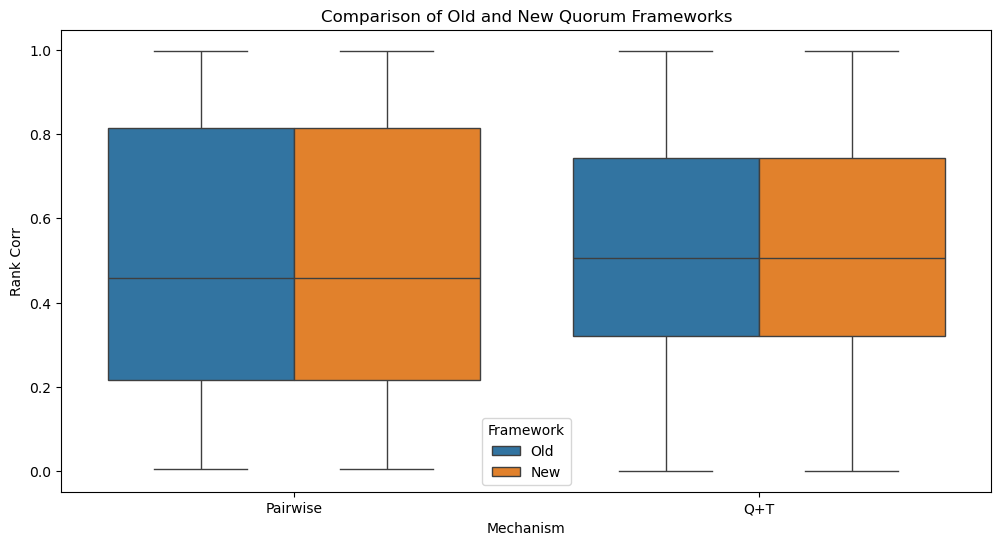

In [12]:

        # Analysis and plotting
        import seaborn as sns  # Added import for seaborn

        def plot_comparison(old_results, new_results):
            df_old = pd.melt(
                old_results, 
                value_vars=['Pairwise', 'Q+T'], value_name='Rank Corr', var_name='Mechanism',
                id_vars=['n_badgeholders', 'avg_expertise', 'avg_laziness', 'n_projects', 'quorum']
            )
            df_old['Framework'] = 'Old'
            
            df_new = pd.melt(
                new_results, 
                value_vars=['Pairwise', 'Q+T'], value_name='Rank Corr', var_name='Mechanism',
                id_vars=['n_badgeholders', 'avg_expertise', 'avg_laziness', 'n_projects', 'quorum']
            )
            df_new['Framework'] = 'New'
            
            combined_df = pd.concat([df_old, df_new])
            
            plt.figure(figsize=(12, 6))
            sns.boxplot(data=combined_df, x='Mechanism', y='Rank Corr', hue='Framework')
            plt.title('Comparison of Old and New Quorum Frameworks')
            plt.show()
        
        plot_comparison(old_results, new_results)
        